# Phoenix modeling residuals w/grouped features after VIF analysis

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="groovy-groove-309018-3049c669c548.json"
client = bigquery.Client()

import seaborn as sns

### Predictors

In [3]:
phoenix_zip = ['85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173']

In [4]:
%load_ext google.cloud.bigquery

In [5]:
%%bigquery acs_phoenix1
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2011_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
UNION ALL
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2012_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');


Downloading: 100%|██████████| 260/260 [00:01<00:00, 139.23rows/s]


In [6]:
%%bigquery acs_phoenix2
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2013_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
UNION ALL
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2014_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
;

Downloading: 100%|██████████| 260/260 [00:02<00:00, 129.97rows/s]


In [7]:
%%bigquery acs_phoenix3
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');


Downloading: 100%|██████████| 130/130 [00:01<00:00, 75.60rows/s]


In [8]:
%%bigquery acs_phoenix4
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2016_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
;

Downloading: 100%|██████████| 130/130 [00:01<00:00, 73.76rows/s]


In [9]:
%%bigquery acs_phoenix5

SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
;

Downloading: 100%|██████████| 130/130 [00:01<00:00, 78.72rows/s]


In [10]:
%%bigquery acs_phoenix6
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2018_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')

Downloading: 100%|██████████| 130/130 [00:01<00:00, 73.53rows/s]


In [11]:
acs_cols1=acs_phoenix1.columns
acs_cols2=acs_phoenix2.columns
acs_cols3=acs_phoenix3.columns
acs_cols4=acs_phoenix4.columns
acs_cols5=acs_phoenix5.columns
acs_cols6=acs_phoenix6.columns

common_columns=list((((((set(acs_cols1).intersection
                        (set(acs_cols2))).intersection
                        (set(acs_cols3))).intersection
                        (set(acs_cols4))).intersection
                        (set(acs_cols5))).intersection
                        (set(acs_cols6))))

In [12]:
dfs=[acs_phoenix1[common_columns],
    acs_phoenix2[common_columns],
    acs_phoenix3[common_columns],
    acs_phoenix4[common_columns],
    acs_phoenix5[common_columns],
    acs_phoenix6[common_columns]]

acs_all_phoenix=pd.concat(dfs)
acs_all_phoenix.shape

(1040, 234)

In [13]:
acs_all_phoenix['do_date'] = acs_all_phoenix['do_date'].astype(str)
acs_all_phoenix['year'] = np.where(acs_all_phoenix['do_date'] =='20072011', '2011',
                                  np.where(acs_all_phoenix['do_date'] =='20082012','2012',
                                  np.where(acs_all_phoenix['do_date'] =='20092013','2013',
                                  np.where(acs_all_phoenix['do_date'] =='20102014','2014',
                                  np.where(acs_all_phoenix['do_date'] =='20112015','2015',
                                  np.where(acs_all_phoenix['do_date'] =='20122016','2016',
                                  np.where(acs_all_phoenix['do_date'] =='20132017','2017',
                                  np.where(acs_all_phoenix['do_date'] =='2014-01-01','2018',
                                           None))))))))

In [14]:
acs_all_phoenix['year'] = acs_all_phoenix['year'].astype('string')


In [15]:
acs_all_phoenix.head()

,commute_less_10_mins,male_45_64_associates_degree,female_under_5,vacant_housing_units_for_sale,high_school_including_ged,female_75_to_79,in_grades_1_to_4,asian_male_55_64,female_65_to_66,rent_10_to_15_percent,employed_information,female_5_to_9,male_67_to_69,sales_office_employed,children_in_single_female_hh,million_dollar_housing_units,female_85_and_over,geo_id,median_age,gini_index,owner_occupied_housing_units_upper_value_quartile,worked_at_home,dwellings_2_units,male_65_to_66,male_25_to_29,female_21,renter_occupied_housing_units_paying_cash_median_gross_rent,male_70_to_74,commuters_16_over,group_quarters,employed_public_administration,employed_other_services_not_public_admin,commuters_by_car_truck_van,pop_determined_poverty_status,households_public_asst_or_food_stamps,median_rent,other_race_pop,income_150000_199999,not_us_citizen_pop,employed_retail_trade,walked_to_work,income_30000_34999,in_school,occupation_natural_resources_construction_maintenance,vacant_housing_units_for_rent,male_45_to_49,two_cars,income_125000_149999,armed_forces,median_year_structure_built,male_20,male_45_to_64,commuters_by_carpool,four_more_cars,amerindian_pop,associates_degree,rent_under_10_percent,income_40000_44999,housing_built_1939_or_earlier,female_18_to_19,income_60000_74999,aggregate_travel_time_to_work,male_10_to_14,mobile_homes,male_male_households,female_30_to_34,housing_built_2000_to_2004,two_parents_not_in_labor_force_families_with_young_children,male_45_64_grade_9_12,employed_wholesale_trade,income_50000_59999,employed_arts_entertainment_recreation_accommodation_food,income_25000_29999,female_62_to_64,rent_35_to_40_percent,male_15_to_17,commute_15_19_mins,occupation_services,two_or_more_races_pop,hispanic_male_45_54,income_15000_19999,asian_male_45_54,pop_25_years_over,commuters_by_subway_or_elevated,female_20,income_100000_124999,male_22_to_24,male_under_5,female_67_to_69,hispanic_male_55_64,income_35000_39999,less_one_year_college,owner_occupied_housing_units_lower_value_quartile,some_college_and_associates_degree,male_45_64_less_than_9_grade,housing_built_2005_or_later,different_house_year_ago_same_city,two_parent_families_with_young_children,masters_degree,rent_20_to_25_percent,pop_5_years_over,percent_income_spent_on_rent,female_35_to_39,commute_25_29_mins,graduate_professional_degree,male_45_64_bachelors_degree,employed_finance_insurance_real_estate,income_75000_99999,female_10_to_14,male_5_to_9,commute_60_more_mins,occupation_sales_office,female_60_to_61,income_less_10000,population_1_year_and_over,bachelors_degree,one_year_more_college,male_18_to_19,not_in_labor_force,income_45000_49999,owner_occupied_housing_units_median_value,employed_agriculture_forestry_fishing_hunting_mining,no_car,white_pop,commute_35_44_mins,dwellings_1_units_attached,female_22_to_24,management_business_sci_arts_employed,three_cars,less_than_high_school_graduate,income_200000_or_more,unemployed_pop,employed_education_health_social,hispanic_pop,income_20000_24999,speak_spanish_at_home_low_english,white_male_55_64,dwellings_3_to_4_units,male_50_to_54,pop_in_labor_force,male_85_and_over,male_80_to_84,married_households,female_80_to_84,commuters_drove_alone,income_per_capita,occupation_production_transportation_material,employed_science_management_admin_waste,no_cars,male_21,female_25_to_29,pop_16_over,female_40_to_44,high_school_diploma,male_pop,female_55_to_59,female_70_to_74,female_pop,in_grades_9_to_12,rent_over_50_percent,income_10000_14999,housing_units_renter_occupied,different_house_year_ago_different_city,civilian_labor_force,employed_transportation_warehousing_utilities,in_undergrad_college,asian_pop,rent_burden_not_computed,commuters_by_public_transportation,male_35_to_39,black_male_55_64,median_income,total_pop,nonfamily_households,households,one_parent_families_with_young_children,rent_30_to_35_percent,dwellings_1_units_detached,black_male_45_54,mortgaged_housing_units,employed_manufacturing,owner_occupied_housing_units,commute_20_24_mins,femal

In [16]:
missing_zip = [el for el in phoenix_zip if el not in list(acs_all_phoenix['geo_id'])]
missing_zip

['85378']

#### Grouping female age columns together

In [17]:
female_under_18 = acs_all_phoenix.female_under_5 + acs_all_phoenix.female_5_to_9 + acs_all_phoenix.female_10_to_14 + acs_all_phoenix.female_15_to_17 + acs_all_phoenix.female_18_to_19
female_under_60 = acs_all_phoenix.female_20 + acs_all_phoenix.female_21 + acs_all_phoenix.female_22_to_24 + acs_all_phoenix.female_25_to_29 + acs_all_phoenix.female_30_to_34 + acs_all_phoenix.female_35_to_39 + acs_all_phoenix.female_40_to_44 + acs_all_phoenix.female_45_to_49 + acs_all_phoenix.female_50_to_54 + acs_all_phoenix.female_55_to_59 
female_over_60 = acs_all_phoenix.female_60_to_61 + acs_all_phoenix.female_62_to_64 + acs_all_phoenix.female_65_to_66 + acs_all_phoenix.female_67_to_69 + acs_all_phoenix.female_70_to_74 + acs_all_phoenix.female_75_to_79 + acs_all_phoenix.female_80_to_84 + acs_all_phoenix.female_85_and_over

In [18]:
female_under_18 = female_under_18.astype(float)
female_under_60 = female_under_60.astype(float)
female_over_60 = female_over_60.astype(float)

#### Grouping male age columns together

In [19]:
male_under_18 = acs_all_phoenix.male_under_5 + acs_all_phoenix.male_5_to_9 + acs_all_phoenix.male_10_to_14 + acs_all_phoenix.male_15_to_17 + acs_all_phoenix.male_18_to_19
male_under_60 = acs_all_phoenix.male_20 + acs_all_phoenix.male_21 + acs_all_phoenix.male_22_to_24 + acs_all_phoenix.male_25_to_29 + acs_all_phoenix.male_30_to_34 + acs_all_phoenix.male_35_to_39 + acs_all_phoenix.male_40_to_44 + acs_all_phoenix.male_45_to_49 + acs_all_phoenix.male_50_to_54 + acs_all_phoenix.male_55_to_59 
male_over_60 =  acs_all_phoenix.male_65_to_66 + acs_all_phoenix.male_67_to_69 + acs_all_phoenix.male_70_to_74 + acs_all_phoenix.male_75_to_79 + acs_all_phoenix.male_80_to_84 + acs_all_phoenix.male_85_and_over

In [20]:
male_under_18 = male_under_18.astype(float)
male_under_60 = male_under_60.astype(float)
male_over_60 = male_over_60.astype(float)

#### Grouping age columns together

In [605]:
age_under_18 = female_under_18.astype(float)+male_under_18.astype(float)
age_18to60 = female_under_60.astype(float)+male_under_60.astype(float)
age_over_60 = female_over_60.astype(float)+male_over_60.astype(float)

#### Grouping by gender

In [608]:
females = female_under_18.astype(float
        )+female_under_60.astype(float
        )+female_over_60.astype(float)

#### Grouping rent affordability columns together

In [21]:
under10 = acs_all_phoenix.rent_under_10_percent
tento50 = acs_all_phoenix.rent_40_to_50_percent + acs_all_phoenix.rent_35_to_40_percent + acs_all_phoenix.rent_30_to_35_percent+ acs_all_phoenix.rent_25_to_30_percent + acs_all_phoenix.rent_20_to_25_percent + acs_all_phoenix.rent_15_to_20_percent + acs_all_phoenix.rent_10_to_15_percent
over50 = acs_all_phoenix.rent_over_50_percent
uncomputed = acs_all_phoenix.rent_burden_not_computed

In [22]:
rent_under10 = under10.astype(float)
rent_tento50 = tento50.astype(float)
rent_over50 = over50.astype(float)
rent_uncomputed = uncomputed.astype(float)

#### Grouping dwellings columns together

In [23]:
small_dwellings = acs_all_phoenix.dwellings_1_units_attached + acs_all_phoenix.dwellings_1_units_detached + acs_all_phoenix.dwellings_2_units + acs_all_phoenix.dwellings_3_to_4_units + acs_all_phoenix.dwellings_5_to_9_units
large_dwellings = acs_all_phoenix.dwellings_10_to_19_units + acs_all_phoenix.dwellings_20_to_49_units + acs_all_phoenix.dwellings_50_or_more_units

In [24]:
small_dwellings = small_dwellings.astype(float)
large_dwellings = large_dwellings.astype(float)

#### Grouping commute time together

In [25]:
commute_less_than_30 =  acs_all_phoenix.commute_less_10_mins + acs_all_phoenix.commute_10_14_mins + acs_all_phoenix.commute_15_19_mins + acs_all_phoenix.commute_20_24_mins + acs_all_phoenix.commute_25_29_mins
commute_less_than_60 = acs_all_phoenix.commute_30_34_mins + acs_all_phoenix.commute_35_44_mins +  acs_all_phoenix.commute_45_59_mins
commute_over_60 =  acs_all_phoenix.commute_60_more_mins 

In [26]:
commute_less_than_30 = commute_less_than_30.astype(float)
commute_less_than_60 = commute_less_than_60.astype(float)
commute_over_60 = commute_over_60.astype(float)

#### Grouping income levels together

In [27]:
income_less_than_60000 = acs_all_phoenix.income_less_10000 + acs_all_phoenix.income_10000_14999 + acs_all_phoenix.income_15000_19999 + acs_all_phoenix.income_20000_24999 + acs_all_phoenix.income_25000_29999 + acs_all_phoenix.income_30000_34999 + acs_all_phoenix.income_35000_39999 + acs_all_phoenix.income_40000_44999 + acs_all_phoenix.income_45000_49999 + acs_all_phoenix.income_50000_59999
income_less_than_125000 = acs_all_phoenix.income_60000_74999 + acs_all_phoenix.income_75000_99999 + acs_all_phoenix.income_100000_124999
income_over_125000 = acs_all_phoenix.income_125000_149999 + acs_all_phoenix.income_150000_199999 + acs_all_phoenix.income_200000_or_more

In [28]:
income_less_than_60000 = income_less_than_60000.astype(float)
income_less_than_125000 = income_less_than_125000.astype(float)
income_over_125000 = income_over_125000.astype(float)

#### Grouping employment industries together

In [29]:
employed_creative = acs_all_phoenix.employed_arts_entertainment_recreation_accommodation_food
employed_prof = acs_all_phoenix.employed_education_health_social + acs_all_phoenix.employed_finance_insurance_real_estate + acs_all_phoenix.employed_information + acs_all_phoenix.employed_science_management_admin_waste
employed_skill = acs_all_phoenix.employed_manufacturing + acs_all_phoenix.employed_construction + acs_all_phoenix.employed_agriculture_forestry_fishing_hunting_mining
employed_service = acs_all_phoenix.employed_retail_trade + acs_all_phoenix.employed_other_services_not_public_admin + acs_all_phoenix.employed_public_administration + acs_all_phoenix.employed_transportation_warehousing_utilities + acs_all_phoenix.employed_wholesale_trade

#### Choosing family type columns

In [30]:
two_parent_hh = acs_all_phoenix.two_parent_families_with_young_children.astype(float)
one_parent_hh = acs_all_phoenix.one_parent_families_with_young_children.astype(float)

#### Choosing population columns

In [31]:
asian_pop = acs_all_phoenix.asian_pop.astype(float)
black_pop = acs_all_phoenix.black_pop.astype(float)
hispanic_pop = acs_all_phoenix.hispanic_pop.astype(float)
white_pop = acs_all_phoenix.white_pop.astype(float)
amerindian_pop = acs_all_phoenix.amerindian_pop.astype(float)
other_race_pop = acs_all_phoenix.other_race_pop.astype(float)
two_or_more_races_pop = acs_all_phoenix.other_race_pop.astype(float)
not_hispanic_pop = acs_all_phoenix.not_hispanic_pop.astype(float)
not_us_citizen_pop = acs_all_phoenix.not_us_citizen_pop.astype(float)
total_pop = acs_all_phoenix.total_pop.astype(float)

In [32]:
pop_columns = [asian_pop, amerindian_pop, black_pop, hispanic_pop, white_pop,other_race_pop,two_or_more_races_pop]

In [33]:
print(asian_pop.sum()+amerindian_pop.sum()+black_pop.sum()+hispanic_pop.sum()+white_pop.sum()+other_race_pop.sum()+two_or_more_races_pop.sum())
print(total_pop.sum())
print(not_hispanic_pop.sum()+hispanic_pop.sum())

32684353.0
33380739.0
33380739.0


#### Grouping education level columns together

In [34]:
college_educated = acs_all_phoenix.in_undergrad_college + acs_all_phoenix.some_college_and_associates_degree + acs_all_phoenix.associates_degree + acs_all_phoenix.bachelors_degree + acs_all_phoenix.bachelors_degree_2 +acs_all_phoenix.bachelors_degree_or_higher_25_64 + acs_all_phoenix.masters_degree + acs_all_phoenix.graduate_professional_degree + acs_all_phoenix.one_year_more_college     
in_school = acs_all_phoenix.in_grades_1_to_4 + acs_all_phoenix.in_grades_5_to_8 + acs_all_phoenix.in_grades_9_to_12
inschoolcheck = acs_all_phoenix.in_school
less_than_college_educated = acs_all_phoenix.less_one_year_college + + acs_all_phoenix.less_one_year_college
high_school_educated = acs_all_phoenix.high_school_diploma + acs_all_phoenix.high_school_including_ged

In [35]:
college_educated = college_educated.astype(float)
in_school = in_school.astype(float)
inschoolcheck = inschoolcheck.astype(float) 
less_than_college_educated = less_than_college_educated.astype(float)
high_school_educated = high_school_educated.astype(float)

In [36]:
print(in_school.sum())
print(inschoolcheck.sum())

5726362.0
8996436.0


#### Grouping commute type columns together

In [37]:
public_commute = acs_all_phoenix.commuters_by_public_transportation + acs_all_phoenix.commuters_by_subway_or_elevated + acs_all_phoenix.commuters_by_bus
personal_commute = acs_all_phoenix.commuters_by_car_truck_van + acs_all_phoenix.commuters_by_carpool + acs_all_phoenix.commuters_drove_alone

In [38]:
public_commute = public_commute.astype(float)
personal_commute = personal_commute.astype(float)

#### Choosing housing units columns

In [39]:
vacant_housing_units = acs_all_phoenix.vacant_housing_units.astype(float)
vacant_housing_units_for_rent = acs_all_phoenix.vacant_housing_units_for_rent.astype(float)
vacant_housing_units_for_sale = acs_all_phoenix.vacant_housing_units_for_sale.astype(float)

In [40]:
print(vacant_housing_units.sum())
print(vacant_housing_units_for_rent.sum()+vacant_housing_units_for_sale.sum())

1913554.0
687179.0


#### Choosing owner occuppied housing units

In [41]:
owner_occupied_housing_units = acs_all_phoenix.owner_occupied_housing_units.astype(float)
owner_occupied_housing_units_lower_value_quartile = acs_all_phoenix.owner_occupied_housing_units_lower_value_quartile.astype(float)
owner_occupied_housing_units_median_value = acs_all_phoenix.owner_occupied_housing_units_median_value.astype(float)
owner_occupied_housing_units_upper_value_quartile = acs_all_phoenix.owner_occupied_housing_units_upper_value_quartile.astype(float)

#### Choosing employment information

In [42]:
unemployed_pop = acs_all_phoenix.unemployed_pop.astype(float)
employed_pop = acs_all_phoenix.employed_pop.astype(float)

#### Choosing family information

In [43]:
family_households = acs_all_phoenix.family_households.astype(float)
nonfamily_households = acs_all_phoenix.nonfamily_households.astype(float)

#### Choosing remaining miscelleanous columns

In [44]:
Year = acs_all_phoenix.year.astype(int)
geo_id = acs_all_phoenix.geo_id.astype(int)
gini_index = acs_all_phoenix.gini_index.astype(float)
income_per_capita = acs_all_phoenix.income_per_capita.astype(float)
median_age = acs_all_phoenix.median_age.astype(float)
median_income = acs_all_phoenix.median_income.astype(float)
married_households = acs_all_phoenix.married_households.astype(float)

#### Building the final dataframe for ACS features before combining with ZRI information

In [609]:
dict = {'Year': Year, 'geo_id': geo_id,'gini_index':gini_index,
        'income_per_capita':income_per_capita,'median_age':median_age,
        'median_income':median_income,'family_households':family_households,
        'nonfamily_households':nonfamily_households,
        'unemployed_pop':unemployed_pop, 'employed_pop':employed_pop, 
        'owner_occupied_housing_units':owner_occupied_housing_units,
        'owner_occupied_housing_units_upper_value_quartile':owner_occupied_housing_units_upper_value_quartile,
        'vacant_housing_units':vacant_housing_units,
        'vacant_housing_units_for_rent':vacant_housing_units_for_rent,
        'vacant_housing_units_for_sale':vacant_housing_units_for_sale,
        'public_commute':public_commute,'personal_commute':personal_commute,
        'college_educated':college_educated, 'in_school':in_school,
        'high_school_educated':high_school_educated,'asian_pop':asian_pop,
        'amerindian_pop':amerindian_pop, 'black_pop':black_pop,
        'hispanic_pop':hispanic_pop,'white_pop':white_pop,
        'other_race_pop':other_race_pop,'two_or_more_races_pop':two_or_more_races_pop,
        'two_parent_hh':two_parent_hh,'one_parent_hh':one_parent_hh,
        'employed_creative':employed_creative, 'employed_prof':employed_prof,
        'employed_skill':employed_skill, 'employed_service':employed_service,
        'income_less_than_60000':income_less_than_60000,
        'income_less_than_125000':income_less_than_125000,
        'income_over_125000':income_over_125000,
        'commute_less_than_30':commute_less_than_30,
        'commute_less_than_60':commute_less_than_60,
        'commute_over_60':commute_over_60, 'small_dwellings':small_dwellings,
        'large_dwellings':large_dwellings,'rent_under10':rent_under10,
        'rent_tento50':rent_tento50, 'rent_over50':rent_over50,
        'rent_uncomputed':rent_uncomputed,'females':females,
        'age_under_18':age_under_18,'age_18to60':age_18to60,
        'age_over_60':age_over_60}

In [610]:
acs_final = pd.DataFrame(dict)

In [611]:
acs_final.shape

(1040, 49)

In [612]:
acs_final.head()

,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60
0,2011,85087,0.3366,33750.0,41.5,78063.0,1654.0,489.0,166.0,3162.0,1821.0,399200.0,694.0,26.0,245.0,22.0,5370.0,NaN,995.0,NaN,200.0,33.0,248.0,372.0,4885.0,12.0,12.0,373.0,73.0,274,1034,798,1056,682.0,975.0,486.0,1182.0,1245.0,389.0,2531.0,0.0,33.0,289.0,0.0,0.0,2697.0,1657.0,3254.0,758.0
1,2011,85296,0.3476,31066.0,30.9,82724.0,9742.0,2423.0,1591.0,19917.0,9093.0,353500.0,529.0,31.0,145.0,142.0,36286.0,NaN,8073.0,NaN,2432.0,58.0,1538.0,5562.0,28179.0,53.0,53.0,3117.0,695.0,2037,9238,3192,5450,3743.0,5965.0,2457.0,11008.0,5938.0,1637.0,12511.0,170.0,37.0,2476.0,456.0,103.0,19367.0,13134.0,22328.0,2560.0
2,2011,85302,0.4077,22735.0,35.1,47884.0,9517.0,5026.0,2114.0,17354.0,8659.0,217600.0,1899.0,825.0,300.0,2239.0,29468.0,NaN,6014.0,NaN,1219.0,322.0,2599.0,10095.0,21667.0,0.0,0.0,1115.0,1860.0,1327,7315,2486,6226,9216.0,4530.0,797.0,9553.0,5932.0,1060.0,12131.0,3820.0,124.0,3840.0,1608.0,312.0,19899.0,10078.0,20642.0,5514.0
3,2011,85390,0.5170,30725.0,53.9,40331.0,2576.0,1619.0,440.0,2634.0,2954.0,417500.0,1103.0,147.0,45.0,0.0,4594.0,NaN,933.0,NaN,0.0,7.0,86.0,841.0,7606.0,0.0,0.0,245.0,211.0,381,1089,454,710,2808.0,1062.0,325.0,1646.0,337.0,508.0,4159.0,243.0,82.0,747.0,318.0,94.0,4346.0,1554.0,3534.0,3185.0
4,2011,85209,0.3623,25637.0,42.1,54409.0,11248.0,4154.0,1071.0,15353.0,11876.0,270300.0,3313.0,408.0,216.0,298.0,27962.0,NaN,6934.0,NaN,657.0,654.0,1796.0,5662.0,30236.0,22.0,22.0,1721.0,771.0,1552,6481,2307,5013,8507.0,5374.0,1521.0,7992.0,5320.0,1197.0,13816.0,666.0,172.0,2464.0,585.0,305.0,19842.0,10452.0,16758.0,11204.0


## Label

This time keep the data into a monthly granularity

In [49]:
zri_all = pd.read_csv('./data/Zip_Zri_AllHomesPlusMultifamily.csv')

In [50]:
zri_all.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,3031.0,3058.0,3031.0,3015.0,2976.0,2914.0,2860.0,2811.0,2792.0,2799.0,2820.0,2852.0,2885.0,2905.0,2883.0,2879.0,2905.0,2916.0,2908.0,2915.0,2920.0,2920.0,2938.0,2999.0,3029.0,3022.0,3049.0,3083.0,3086.0,3072.0,3081.0,3095.0,3147.0,3190.0,3188.0,3149.0,3149.0,3174.0,3175.0,3230.0,3267.0,3285.0,3234.0,3296.0,3357.0,3366.0,NaN,3186.0,3204.0,NaN,NaN,NaN,3682.0,3767.0,3767.0,3811.0,3793.0,3894.0,3919.0,NaN,NaN,NaN,NaN,4166.0,4164.0,4133.0,4015.0,3943.0,3945.0,4051.0,NaN,NaN,NaN,NaN,4916.0,NaN,5009.0,NaN,NaN,NaN,NaN,3988.0,NaN,NaN,3661.0,NaN,NaN,NaN,NaN,3512.0,3552.0,NaN,3768.0,3731.0,3634.0,NaN,NaN,3300.0,3227.0,NaN,NaN,NaN,NaN,3785.0,3788.0,3786.0,3784.0,3766.0,3779.0,3843.0,3873.0,3835.0,NaN
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,1790.0,1787.0,1784.0,1774.0,1755.0,1742.0,1735.0,1741.0,1742.0,1757.0,1790.0,1817.0,1839.0,1841.0,1844.0,1844.0,1820.0,1818.0,1829.0,1843.0,1860.0,1878.0,1898.0,1889.0,1890.0,1894.0,1897.0,1886.0,1884.0,1887.0,1907.0,1918.0,1925.0,1948.0,1996.0,2017.0,2011.0,2002.0,1989.0,1984.0,1979.0,1976.0,1969.0,1989.0,1996.0,2001.0,2006.0,2009.0,2032.0,2045.0,2038.0,2028.0,2016.0,2028.0,2033.0,2027.0,2041.0,2071.0,2100.0,2136.0,2139.0,2119.0,2093.0,2079.0,2061.0,2058.0,2079.0,2100.0,2115.0,2150.0,2184.0,2201.0,2212.0,2207.0,2182.0,2136.0,2108.0,2104.0,2117.0,2118.0,2125.0,2146.0,2168.0,2183.0,2165.0,2128.0,2097.0,2070.0,2057.0,2052.0,2054.0,2061.0,2074.0,2106.0,2134.0,2146.0,2155.0,2149.0,2116.0,2076.0,2025.0,2014.0,2017.0,2039.0,2070.0,2105.0,2140.0,2168.0,2185.0,2125.0,NaN,2053.0,1996.0
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,3269.0,3304.0,3320.0,3322.0,3283.0,3225.0,3133.0,3086.0,3017.0,3005.0,3010.0,3016.0,3028.0,3069.0,3020.0,2999.0,2988.0,3023.0,3037.0,3055.0,3069.0,3058.0,3065.0,3104.0,3117.0,3118.0,3124.0,3128.0,3098.0,3078.0,3119.0,3150.0,3183.0,3227.0,3233.0,3199.0,3217.0,3255.0,3274.0,3346.0,3357.0,3363.0,3287.0,3312.0,3385.0,3385.0,NaN,3231.0,3258.0,NaN,NaN,NaN,NaN,4011.0,3985.0,4026.0,4012.0,NaN,NaN,NaN,NaN,NaN,NaN,4734.0,4800.0,4690.0,4693.0,NaN,4418.0,4534.0,NaN,4753.0,4687.0,4788.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4176.0,NaN,3997.0,3924.0,NaN,NaN,NaN,NaN,3802.0,3809.0,3900.0,3999.0,4043.0,3957.0,NaN,NaN,3611.0,3560.0,NaN,NaN,NaN,3928.0,3874.0,3898.0,3917.0,3929.0,3931.0,3963.0,NaN,4123.0,4079.0,NaN
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1547.0,1549.0,1560.0,1560.0,1542.0,1547.0,1559.0,1578.0,1591.0,1597.0,1604.0,1609.0,1607.0,1598.0,1591.0,1591.0,1606.0,1614.0,1617.0,1612.0,1611.0,1617.0,1630.0,1640.0,1649.0,1655.0,1658.0,1658.0,1661.0,1675.0,1698.0,1727.0,1753.0,1771.0,1789.0,1808.0,1852.0,1882.0,1906.0,1920.0,1930.0,1936.0,1931.0,1925.0,1929.0,1935.0,1953.0,1967.0,1984.0,1994.0,1999.0,1999.0,1945.0,1917.0,1906.0,1903.0,1908.0,1919.0,1933.0,1944.0,1931.0,1924.0,1918.0,1915.0,1881.0,1859.0,1839.0,1828.0,1827.0,1826.0,1830.0,1826.0,1801.0,1782.0,1772.0,1767.0,1765.0,1763.0,1762.0,1760.0,1752.0,1753.0,1757

In [51]:
zri_phoenix = zri_all[zri_all['RegionName'].isin(phoenix_zip)]
zri_phoenix.shape

(131, 120)

In [52]:
valueCols=[col for col in zri_phoenix.columns if '20' in col] #columns with the indices
indexCols=[col for col in zri_phoenix.columns if '20' not in col] #columns without the indices
zri_long=pd.melt(zri_phoenix, id_vars=indexCols,value_vars=valueCols, var_name="year_month",
                 value_name="zri")
zri_long['year_month'] = pd.to_datetime(zri_long['year_month'])
zri_long['year'] = zri_long['year_month'].dt.year
zri_long['year'] = zri_long['year'].astype('string')
zri_long['month'] = zri_long['year_month'].dt.month
zri_long['month'] = zri_long['month'].astype('string')
zri_long['RegionName'] = zri_long['RegionName'].astype('string')
zri_long.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month
0,94748,85032,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,70,2010-09-01,1155.0,2010,9
1,94870,85281,Tempe,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,106,2010-09-01,1069.0,2010,9
2,94820,85225,Chandler,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,115,2010-09-01,1048.0,2010,9
3,94890,85308,Glendale,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,147,2010-09-01,1049.0,2010,9
4,417444,85142,Queen Creek,AZ,Phoenix-Mesa-Scottsdale,Pinal County,293,2010-09-01,1271.0,2010,9


In [613]:
acs_final['geo_id'] = acs_final['geo_id'].astype('string')
acs_final['Year'] = acs_final['Year'].astype('string')


In [627]:
full_df = pd.merge(zri_long, acs_final, how = 'left', left_on = ['RegionName', 'year'], 
                  right_on = ['geo_id', 'Year' ])
print(full_df.shape)
full_df.sample(5)

(14803, 60)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60
6279,94939,85363,Youngtown,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,9979,2014-08-01,944.0,2014,8,2014,85363,0.4300,17598.0,35.8,35737.0,1344.0,948.0,401.0,2223.0,1166.0,135700.0,369.0,155.0,55.0,56.0,4064.0,3976.0,1175.0,2746.0,60.0,5.0,118.0,2318.0,3869.0,0.0,0.0,404.0,170.0,259,925,284,755,1652.0,533.0,107.0,1184.0,861.0,111.0,2385.0,267.0,51.0,473.0,468.0,134.0,3359.0,1886.0,3075.0,1276.0
3950,94846,85254,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,794,2013-03-01,1781.0,2013,3,2013,85254,0.4194,44650.0,43.0,90718.0,12501.0,5452.0,1598.0,24732.0,13180.0,466200.0,2314.0,436.0,205.0,384.0,42812.0,67521.0,7155.0,9075.0,2052.0,121.0,664.0,2180.0,39928.0,14.0,14.0,2180.0,323.0,2053,13783,2527,6369,5687.0,6457.0,5809.0,15944.0,5834.0,282.0,17864.0,2373.0,267.0,3057.0,1148.0,301.0,23705.0,10745.0,25036.0,7842.0
4537,417440,85132,Florence,AZ,Phoenix-Mesa-Scottsdale,Pinal County,4053,2013-07-01,906.0,2013,7,2013,85132,0.3748,13755.0,37.9,48135.0,4947.0,2239.0,787.0,6025.0,5253.0,171900.0,3036.0,206.0,726.0,0.0,10712.0,22202.0,3777.0,12866.0,183.0,1547.0,1838.0,13468.0,17556.0,2.0,2.0,944.0,436.0,549,1809,1010,2657,4708.0,2071.0,407.0,3246.0,1437.0,878.0,7267.0,155.0,12.0,1257.0,345.0,319.0,10542.0,5863.0,22804.0,5653.0
13454,94888,85306,Glendale,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,4902,2019-03-01,1271.0,2019,3,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,94888,85306,Glendale,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,4902,2011-04-01,971.0,2011,4,2011,85306,0.3911,26408.0,37.2,56384.0,6073.0,3223.0,1424.0,12440.0,6032.0,241300.0,754.0,407.0,42.0,280.0,21544.0,NaN,3780.0,NaN,596.0,378.0,830.0,3654.0,18644.0,14.0,14.0,888.0,581.0,753,5466,1882,4339,5001.0,3319.0,976.0,6823.0,3895.0,731.0,8201.0,1680.0,55.0,2055.0,875.0,279.0,12572.0,6224.0,14079.0,3563.0


In [426]:
%%bigquery area_zip

SELECT  zip_code, area_land_meters, area_water_meters

FROM `bigquery-public-data.geo_us_boundaries.zip_codes`

Downloading: 100%|██████████| 33113/33113 [00:01<00:00, 17237.57rows/s]


In [628]:
cols = area_zip.columns
area_zip[cols] = area_zip[cols].apply(pd.to_numeric, errors='coerce')
area_zip['zip_code'] = area_zip['zip_code'].astype(str)
full_df['geo_id'] = full_df['geo_id'].astype(str)

In [629]:
full_df = pd.merge(full_df, area_zip, how = 'left', left_on = 'geo_id',
                      right_on = 'zip_code')
full_df = full_df.drop(columns = ['year_month'])
full_df.sample(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,zip_code,area_land_meters,area_water_meters
11574,94731,85015,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,1708,1104.0,2018,1,2018,85015,0.4752,19308.0,32.0,34636.0,8407.0,6478.0,1606.0,17160.0,5439.0,227000.0,2187.0,1242.0,146.0,2907.0,27396.0,26574.0,7504.0,12779.0,2379.0,1364.0,4682.0,17932.0,12113.0,23.0,23.0,1538.0,2112.0,1782,7865,2926,4587,11178.0,2928.0,779.0,9893.0,5359.0,1082.0,11387.0,5451.0,202.0,6048.0,2591.0,605.0,19730.0,12044.0,21924.0,4906.0,85015,12646727.0,29710.0
519,94750,85034,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,10691,956.0,2010,12,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11259,94937,85361,Surprise,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,10127,1220.0,2017,10,2017,85361,0.4190,24300.0,42.4,55431.0,1536.0,484.0,187.0,2384.0,1732.0,278800.0,545.0,0.0,44.0,0.0,4092.0,4349.0,1149.0,2538.0,102.0,0.0,34.0,292.0,5216.0,0.0,0.0,110.0,158.0,211,940,333,900,1149.0,716.0,155.0,711.0,894.0,448.0,1753.0,0.0,0.0,118.0,78.0,92.0,2846.0,1589.0,2901.0,1099.0,85361,307007216.0,356132.0
10606,94750,85034,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,10691,1171.0,2017,5,2017,85034,0.4697,13484.0,28.9,24454.0,775.0,838.0,383.0,1749.0,390.0,178200.0,553.0,204.0,0.0,210.0,2460.0,2487.0,974.0,876.0,61.0,180.0,300.0,3141.0,774.0,0.0,0.0,81.0,245.0,239,808,251,451,1307.0,281.0,25.0,1111.0,357.0,95.0,1583.0,533.0,38.0,790.0,334.0,61.0,2268.0,1429.0,2442.0,455.0,85034,29584409.0,129906.0
14180,94745,85029,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,1190,1254.0,2019,9,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [632]:
#There are zipcodes that don't have data for speficific months in the acs dataframe. Identify
#them and drop them

many_missing_row = full_df.loc[full_df.isnull().mean(axis=1) > 0.3].index
full_df = full_df.drop(labels = many_missing_row)
full_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,zip_code,water_land_ratio
524,94748,85032,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,70,1149.0,2011,1,2011,85032,0.4215,25198.0,34.3,50012.0,16406.0,10840.0,2912.0,36634.0,16098.0,278900.0,3414.0,1197.0,525.0,2342.0,61834.0,NaN,11035.0,NaN,2176.0,229.0,1829.0,18488.0,47243.0,119.0,119.0,3838.0,2560.0,4270,16282,5352,10730,15890.0,8830.0,2526.0,22500.0,10302.0,1396.0,21908.0,7181.0,216.0,7878.0,2508.0,546.0,35702.0,19625.0,40964.0,9094.0,85032,0.000525
525,94870,85281,Tempe,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,106,1029.0,2011,1,2011,85281,0.4757,18272.0,24.2,33937.0,7306.0,13715.0,3562.0,29050.0,5598.0,251000.0,3651.0,1978.0,397.0,3977.0,39736.0,NaN,4083.0,NaN,4886.0,1703.0,1977.0,12488.0,32479.0,103.0,103.0,1284.0,1672.0,5632,12892,4095,6431,15721.0,4470.0,830.0,20339.0,5591.0,1002.0,14732.0,9163.0,389.0,9153.0,4366.0,1515.0,25044.0,15486.0,36772.0,2626.0,85281,0.009828
526,94820,85225,Chandler,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,115,1002.0,2011,1,2011,85225,0.3943,25183.0,30.5,55933.0,16336.0,8721.0,3496.0,34927.0,14621.0,267000.0,3003.0,1094.0,451.0,984.0,62062.0,NaN,11987.0,NaN,2818.0,650.0,3915.0,25126.0,35438.0,38.0,38.0,4028.0,3105.0,3529,14807,6199,10392,13299.0,9185.0,2573.0,20859.0,10163.0,1621.0,22877.0,3732.0,417.0,7739.0,1868.0,412.0,35738.0,21887.0,39901.0,5918.0,85225,0.000066
527,94890,85308,Glendale,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,147,1059.0,2011,1,2011,85308,0.3894,32129.0,38.2,70101.0,17059.0,7257.0,2295.0,34239.0,18054.0,341500.0,2332.0,653.0,149.0,976.0,60422.0,NaN,11060.0,NaN,2962.0,395.0,1440.0,8038.0,50300.0,48.0,48.0,3282.0,799.0,2858,15126,5484,10771,9853.0,9937.0,4526.0,19358.0,10581.0,1498.0,23022.0,2920.0,193.0,4250.0,1527.0,292.0,32815.0,17037.0,38280.0,8079.0,85308,0.019978
528,417444,85142,Queen Creek,AZ,Phoenix-Mesa-Scottsdale,Pinal County,293,1298.0,2011,1,2011,85142,0.3560,25364.0,29.1,72520.0,11219.0,2319.0,1782.0,20392.0,11173.0,345400.0,2286.0,310.0,363.0,34.0,35656.0,NaN,10151.0,NaN,816.0,497.0,1826.0,9945.0,31667.0,350.0,350.0,4903.0,1252.0,1620,8366,4098,6308,5087.0,6266.0,2185.0,6527.0,8708.0,3128.0,14516.0,165.0,157.0,1519.0,549.0,140.0,23314.0,17769.0,23687.0,3772.0,85142,0.000487


Drop those columns that have more than 30% missing values 

In [634]:
missing_30perc = full_df.columns[full_df.isnull().mean() > 0.3]
full_df = full_df.drop(columns = missing_30perc)
#no columns were dropped!

In [618]:
def print_missingness(dataframe):# Number of rows and columns in the dataframe 
    nulls = dataframe.isnull().sum(axis = 0)
    print(f'The number of observations is {(dataframe.shape[0])}')
    print(f'The number of variables is {(dataframe.shape[1])}')
    print('    ')

    # Total number of missing values in the training set
    print(f'The total number of missing values is {(dataframe.isna().sum().sum())}')

    # Total number of rows with missing values. 
    print(f'The number of rows with missing values is {(dataframe.shape[0] - dataframe.dropna().shape[0])}')


    print('---   ---   ---   ---   ---   ---   ---   ---   ---')
    print(nulls[nulls>1].sort_values())

In [636]:
#drop the zipcode with majority of missing values
full_df = full_df[full_df["RegionName"]!='85378']

In [635]:
full_df.shape

(12480, 61)

### Feature engeneering 

In [630]:
full_df['water_land_ratio'] = full_df['area_water_meters']/full_df['area_land_meters']


full_df = full_df.drop( columns = [ 'area_land_meters',
                                   'area_water_meters'])

In [631]:
full_df.sample(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,zip_code,water_land_ratio
13854,94747,85031,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,5647,1126.0,2019,6,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563,94737,85021,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,1493,1059.0,2011,1,2011,85021,0.5347,26203.0,32.8,39556.0,8337.0,6431.0,2018.0,16143.0,6315.0,446200.0,3099.0,1637.0,344.0,2014.0,26238.0,NaN,5766.0,NaN,2055.0,1643.0,2685.0,12359.0,17847.0,0.0,0.0,2006.0,1371.0,1603,7953,2660,3927,9976.0,3096.0,1696.0,9659.0,4518.0,976.0,11318.0,5982.0,254.0,5468.0,2154.0,577.0,18860.0,10610.0,20638.0,5122.0,85021,0.004299
5997,94854,85262,Scottsdale,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,6109,2446.0,2014,6,2014,85262,0.5082,84978.0,54.9,133199.0,3903.0,943.0,275.0,5049.0,4478.0,975700.0,2453.0,52.0,198.0,0.0,7926.0,18778.0,1158.0,2101.0,509.0,18.0,236.0,148.0,9826.0,0.0,0.0,343.0,66.0,235,2869,687,1258,1099.0,1177.0,2570.0,1425.0,2228.0,414.0,7299.0,0.0,81.0,219.0,20.0,48.0,5291.0,1625.0,4980.0,3746.0,85262,0.000505


In [637]:
print_missingness(full_df)

The number of observations is 12480
The number of variables is 61
    
The total number of missing values is 3230
The number of rows with missing values is 1646
---   ---   ---   ---   ---   ---   ---   ---   ---
zri                      110
college_educated        1560
high_school_educated    1560
dtype: int64


### Predicting ZRI values of 2018 with 2016 features

The education features hold a high level of correlation (see the 2015 EDA and initial models file). In addition, manuy of these features have high number of missing values. It's reasonable to only keep less than highschool diploma because it 'binarizes' the population. 

In [639]:
df_model = full_df.copy()
df_model = full_df.drop(columns = ['RegionID','SizeRank'])
df_model.sample(5)

,RegionName,City,State,Metro,CountyName,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,zip_code,water_land_ratio
8129,85383,Peoria,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,1404.0,2015,11,2015,85383,0.3740,40481.0,36.6,102773.0,10943.0,2138.0,718.0,19632.0,11265.0,408400.0,2133.0,105.0,188.0,132.0,34056.0,52050.0,8571.0,7443.0,1960.0,332.0,899.0,3553.0,33254.0,63.0,63.0,3268.0,410.0,1540.000000000,9356.000000000,2890.000000000,5846.000000000,2679.0,5695.0,4707.0,8521.0,7595.0,1340.0,14841.0,252.0,42.0,1328.0,298.0,148.0,20649.0,13245.0,21804.0,4843.0,85383,0.015899
9882,85233,Gilbert,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,1352.0,2016,12,2016,85233,0.3661,33282.0,36.2,77415.0,8801.0,3897.0,1113.0,19713.0,8572.0,325700.0,1060.0,212.0,103.0,338.0,34406.0,44740.0,6197.0,7796.0,2629.0,202.0,859.0,6790.0,23992.0,27.0,27.0,1875.0,455.0,1792,8856,3162,5903,4650.0,5387.0,2661.0,12003.0,5455.0,612.0,12405.0,1323.0,110.0,3226.0,633.0,157.0,18615.0,9856.0,20703.0,4673.0,85233,0.013800
1888,85035,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,844.0,2011,11,2011,85035,0.3925,11827.0,23.5,35778.0,10133.0,2753.0,2759.0,17794.0,6066.0,181500.0,2080.0,1166.0,229.0,1200.0,31794.0,NaN,11464.0,NaN,445.0,815.0,2262.0,39736.0,4082.0,50.0,50.0,2894.0,3990.0,1920,5040,5160,5674,10101.0,2549.0,236.0,10603.0,5352.0,1189.0,10907.0,3978.0,92.0,4467.0,1839.0,422.0,24475.0,20555.0,23963.0,2573.0,85035,0.000000
12060,85204,Mesa,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,1254.0,2018,5,2018,85204,0.4088,20956.0,31.7,50801.0,14753.0,7424.0,2035.0,33617.0,12163.0,225100.0,1610.0,277.0,259.0,1106.0,59398.0,52532.0,12281.0,20856.0,1203.0,1348.0,1357.0,32501.0,30830.0,104.0,104.0,4041.0,2652.0,3731,13984,6253,9649,13163.0,7228.0,1786.0,21097.0,9006.0,1810.0,18181.0,3090.0,119.0,6646.0,2806.0,443.0,34831.0,21085.0,38036.0,8657.0,85204,0.000483
12504,85037,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,1182.0,2018,8,2018,85037,0.3570,18297.0,27.4,56370.0,11607.0,2926.0,1861.0,25562.0,8200.0,189600.0,879.0,260.0,38.0,750.0,47534.0,28869.0,12791.0,17322.0,1449.0,784.0,4312.0,36652.0,11070.0,49.0,49.0,2735.0,2471.0,2249,8956,5348,9009,7887.0,5514.0,1132.0,12831.0,8982.0,2747.0,14290.0,1031.0,211.0,4471.0,1430.0,221.0,27021.0,19912.0,29819.0,4728.0,85037,0.001621


### Features

In [641]:
features = df_model[(df_model['year'].isin(['2016']))]
features.head()

,RegionName,City,State,Metro,CountyName,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,zip_code,water_land_ratio
8384,85032,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,1229.0,2016,1,2016,85032,0.4175,24828.0,35.5,48608.0,16047.0,11318.0,2996.0,37412.0,14726.0,262000.0,2537.0,607.0,301.0,1972.0,63190.0,72477.0,11067.0,19886.0,2715.0,372.0,2093.0,19901.0,44542.0,217.0,217.0,3012.0,2489.0,4611,17718,4970,10113,16540.0,8221.0,2604.0,23830.0,9699.0,1087.0,21735.0,6527.0,201.0,9258.0,2645.0,535.0,36116.0,18559.0,41829.0,9775.0,85032,0.000525
8385,85281,Tempe,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,1245.0,2016,1,2016,85281,0.5071,18006.0,23.8,31921.0,6774.0,15284.0,2637.0,33658.0,4529.0,237600.0,3991.0,2107.0,40.0,4245.0,46804.0,71138.0,4037.0,8262.0,6824.0,1563.0,3464.0,14186.0,33198.0,77.0,77.0,1022.0,1199.0,6797,16134,2717,8010,16426.0,4530.0,1102.0,24532.0,6251.0,943.0,14020.0,11351.0,479.0,9469.0,5709.0,1872.0,28053.0,15451.0,41505.0,3564.0,85281,0.009828
8386,85225,Chandler,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,1183.0,2016,1,2016,85225,0.4237,25853.0,32.1,56272.0,16524.0,8046.0,2456.0,36144.0,13229.0,251800.0,1801.0,484.0,234.0,952.0,65024.0,65456.0,12222.0,19285.0,3883.0,1258.0,4130.0,24756.0,34048.0,112.0,112.0,3451.0,2385.0,3508,15456,6293,10887,13170.0,8203.0,3197.0,23684.0,8733.0,1745.0,21789.0,3258.0,280.0,8413.0,2070.0,578.0,34704.0,20073.0,41127.0,7588.0,85225,0.000066
8387,85308,Glendale,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,1199.0,2016,1,2016,85308,0.4046,33037.0,39.7,70309.0,16999.0,7303.0,2014.0,33410.0,16388.0,299400.0,2312.0,240.0,336.0,671.0,57522.0,77909.0,9921.0,18534.0,3440.0,445.0,1653.0,8384.0,50067.0,0.0,0.0,2810.0,952.0,2519,17044,3930,9917,10510.0,8988.0,4804.0,18796.0,9919.0,1699.0,23364.0,2554.0,109.0,5789.0,1405.0,611.0,34120.0,15379.0,36901.0,11444.0,85308,0.019978
8388,85142,Queen Creek,AZ,Phoenix-Mesa-Scottsdale,Pinal County,1371.0,2016,1,2016,85142,0.4000,28842.0,32.9,76384.0,13312.0,3388.0,943.0,24665.0,13419.0,347900.0,2814.0,549.0,493.0,96.0,42908.0,54936.0,13592.0,13522.0,1255.0,309.0,1459.0,10906.0,40628.0,47.0,47.0,4643.0,824.0,1870,11445,4131,7219,6298.0,6543.0,3859.0,8647.0,10686.0,2842.0,18399.0,492.0,73.0,2499.0,424.0,285.0,27804.0,21093.0,27798.0,5775.0,85142,0.000487


In [642]:
print_missingness(features) 

The number of observations is 1560
The number of variables is 59
    
The total number of missing values is 10
The number of rows with missing values is 10
---   ---   ---   ---   ---   ---   ---   ---   ---
zri    10
dtype: int64


In [643]:
features['year'] = features['year'].astype('string')
features['month'] = features['month'].astype('string')



<ipython-input-643-ab9108fa5bf6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-643-ab9108fa5bf6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



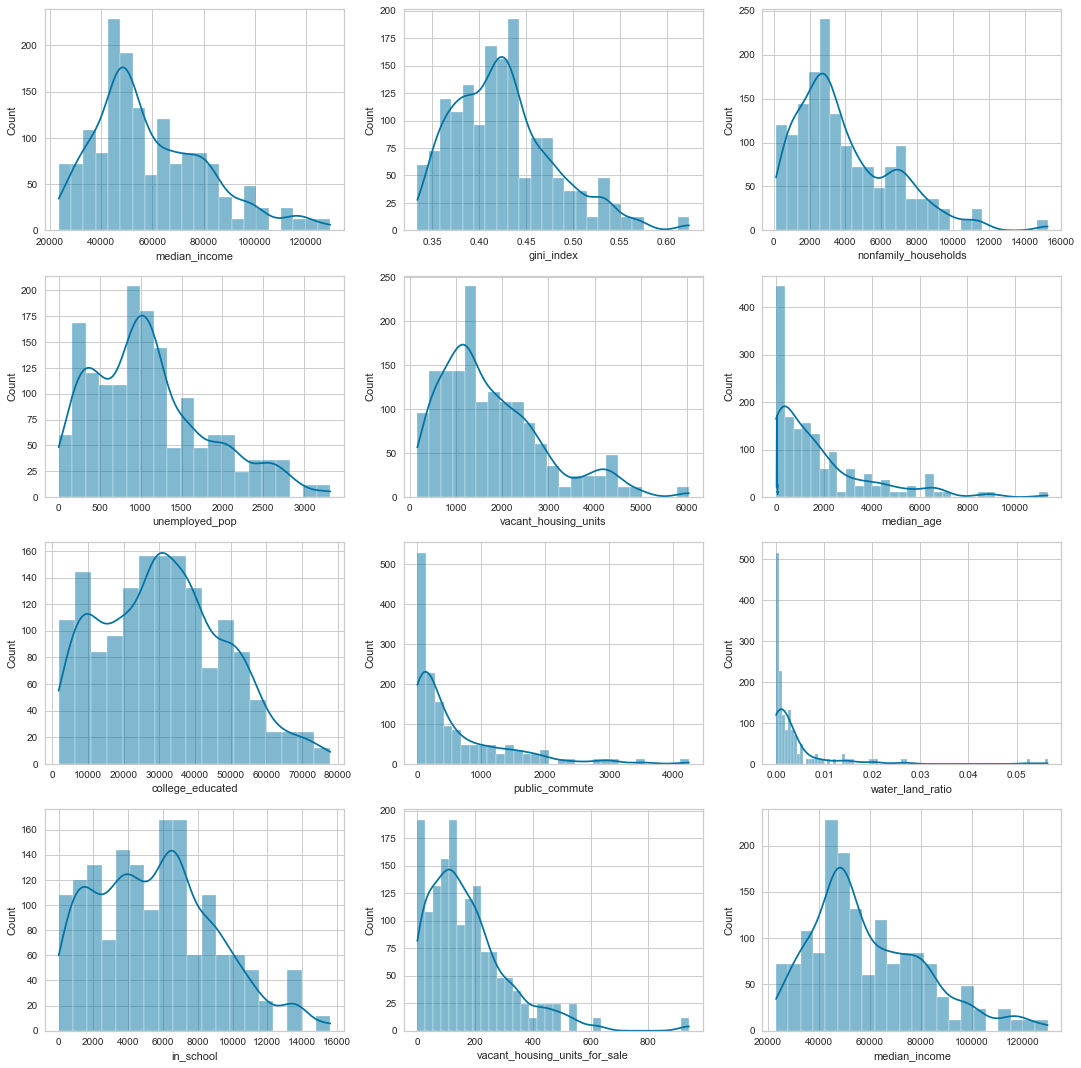

In [644]:
#see a few features
f, axes = plt.subplots(4, 3, figsize=(15,15))

sns.histplot( x= "median_income", data=features,  ax=axes[0,0], kde = True)
sns.histplot( x= "gini_index", data=features,  ax=axes[0,1], kde = True)
sns.histplot( x= "nonfamily_households", data=features, ax=axes[0,2], kde = True)
sns.histplot( x= "unemployed_pop", data=features,  ax=axes[1,0], kde = True)
sns.histplot( x= "vacant_housing_units", data=features,  ax=axes[1,1], kde = True)
sns.histplot( x= "median_age", data=features,  ax=axes[1,2], kde = True)
sns.histplot( x= "large_dwellings", data=features,  ax=axes[1,2], kde = True)
sns.histplot( x= "college_educated", data=features,  ax=axes[2,0], kde = True)
sns.histplot( x= "public_commute", data=features,  ax=axes[2,1], kde = True)
sns.histplot( x= "water_land_ratio", data=features,  ax=axes[2,2], kde = True)
sns.histplot( x= "in_school", data=features,  ax=axes[3,0], kde = True)
sns.histplot( x= "vacant_housing_units_for_sale", data=features,  ax=axes[3,1], kde = True)
sns.histplot( x= "median_income", data=features,  ax=axes[3,2], kde = True)

plt.tight_layout();

### Label

In [645]:
label = df_model[(df_model['year'].isin(['2018']))][['zri']]
label.head()

,zri
11528,1319.0
11529,1314.0
11530,1296.0
11531,1277.0
11532,1459.0


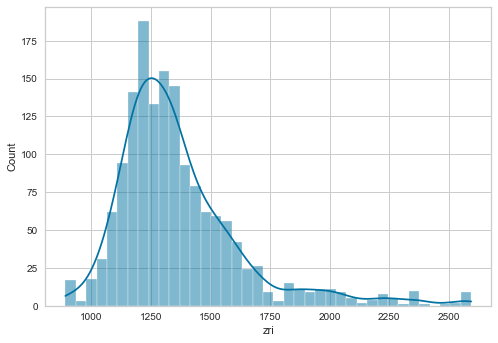

In [646]:
sns.histplot( x= "zri", data=label, kde = True);


In [647]:
label_trans = np.log(label)
label_trans.head()

,zri
11528,7.184629
11529,7.180831
11530,7.167038
11531,7.152269
11532,7.285507


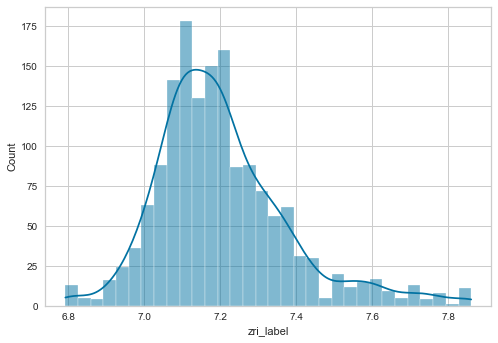

In [648]:
label_trans.rename(columns = {'zri':'zri_label'}, inplace = True)
sns.histplot( x= "zri_label", data=label_trans, kde = True);

In [649]:
label_trans.shape[0]

1560

In [650]:
features.shape[0]

1560

In [651]:
#transform zri to log scale
features['zri'] = pd.to_numeric(features['zri'], errors='coerce')
features['zri'] = np.log(features['zri'])

<ipython-input-651-11f3491b5a55>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-651-11f3491b5a55>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [652]:
features = features.reset_index(drop = True)
label_trans = label_trans.reset_index(drop = True)
lab_and_features = pd.concat([label_trans,features], axis = 1)
lab_and_features.head(5)

,zri_label,RegionName,City,State,Metro,CountyName,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,zip_code,water_land_ratio
0,7.184629,85032,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,7.113956,2016,1,2016,85032,0.4175,24828.0,35.5,48608.0,16047.0,11318.0,2996.0,37412.0,14726.0,262000.0,2537.0,607.0,301.0,1972.0,63190.0,72477.0,11067.0,19886.0,2715.0,372.0,2093.0,19901.0,44542.0,217.0,217.0,3012.0,2489.0,4611,17718,4970,10113,16540.0,8221.0,2604.0,23830.0,9699.0,1087.0,21735.0,6527.0,201.0,9258.0,2645.0,535.0,36116.0,18559.0,41829.0,9775.0,85032,0.000525
1,7.180831,85281,Tempe,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,7.126891,2016,1,2016,85281,0.5071,18006.0,23.8,31921.0,6774.0,15284.0,2637.0,33658.0,4529.0,237600.0,3991.0,2107.0,40.0,4245.0,46804.0,71138.0,4037.0,8262.0,6824.0,1563.0,3464.0,14186.0,33198.0,77.0,77.0,1022.0,1199.0,6797,16134,2717,8010,16426.0,4530.0,1102.0,24532.0,6251.0,943.0,14020.0,11351.0,479.0,9469.0,5709.0,1872.0,28053.0,15451.0,41505.0,3564.0,85281,0.009828
2,7.167038,85225,Chandler,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,7.075809,2016,1,2016,85225,0.4237,25853.0,32.1,56272.0,16524.0,8046.0,2456.0,36144.0,13229.0,251800.0,1801.0,484.0,234.0,952.0,65024.0,65456.0,12222.0,19285.0,3883.0,1258.0,4130.0,24756.0,34048.0,112.0,112.0,3451.0,2385.0,3508,15456,6293,10887,13170.0,8203.0,3197.0,23684.0,8733.0,1745.0,21789.0,3258.0,280.0,8413.0,2070.0,578.0,34704.0,20073.0,41127.0,7588.0,85225,0.000066
3,7.152269,85308,Glendale,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,7.089243,2016,1,2016,85308,0.4046,33037.0,39.7,70309.0,16999.0,7303.0,2014.0,33410.0,16388.0,299400.0,2312.0,240.0,336.0,671.0,57522.0,77909.0,9921.0,18534.0,3440.0,445.0,1653.0,8384.0,50067.0,0.0,0.0,2810.0,952.0,2519,17044,3930,9917,10510.0,8988.0,4804.0,18796.0,9919.0,1699.0,23364.0,2554.0,109.0,5789.0,1405.0,611.0,34120.0,15379.0,36901.0,11444.0,85308,0.019978
4,7.285507,85142,Queen Creek,AZ,Phoenix-Mesa-Scottsdale,Pinal County,7.223296,2016,1,2016,85142,0.4000,28842.0,32.9,76384.0,13312.0,3388.0,943.0,24665.0,13419.0,347900.0,2814.0,549.0,493.0,96.0,42908.0,54936.0,13592.0,13522.0,1255.0,309.0,1459.0,10906.0,40628.0,47.0,47.0,4643.0,824.0,1870,11445,4131,7219,6298.0,6543.0,3859.0,8647.0,10686.0,2842.0,18399.0,492.0,73.0,2499.0,424.0,285.0,27804.0,21093.0,27798.0,5775.0,85142,0.000487


Drop all the rows that don't have a value for the 2018 zri label

In [653]:
missing_labels = lab_and_features[(lab_and_features['zri_label'].isna())].index
lab_and_features = lab_and_features.drop(index = missing_labels)
lab_and_features.shape[0]

1554

In [654]:
print_missingness(lab_and_features)

The number of observations is 1554
The number of variables is 60
    
The total number of missing values is 10
The number of rows with missing values is 10
---   ---   ---   ---   ---   ---   ---   ---   ---
zri    10
dtype: int64


## Benchmark model
### Predicting zri with historical zri values

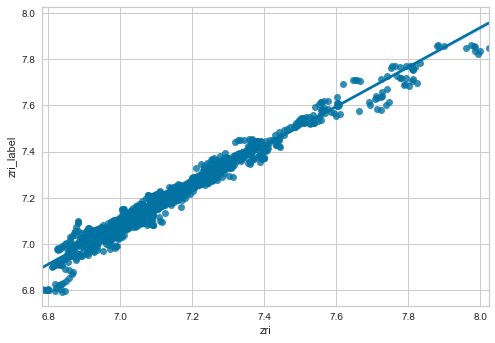

In [655]:

sns.regplot( x= "zri", y = 'zri_label', data=lab_and_features);

#### Train test split

In [656]:
from sklearn.model_selection import train_test_split

Xbase = lab_and_features[['zri']]
y = lab_and_features['zri_label']
#benchmark model

XtrainB, XtestB, ytrainB, ytestB = train_test_split(Xbase,y)

### Imputation

In [657]:
XtrainB = XtrainB.fillna(method = 'ffill')
XtestB = XtestB.fillna(method = 'ffill')

No need to do scaling since the data are on the same scale and similar distributions

### OLS

In [658]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

base_ols = LinearRegression()
base_ols.fit(XtrainB,ytrainB)

print(f'Linear regression training score: {base_ols.score(XtrainB,ytrainB)}')
print(f'Linear regression testing score: {base_ols.score(XtestB,ytestB)}')

y_pred = base_ols.predict(XtestB)
RMSE = mean_squared_error(ytestB,y_pred,squared = False)
print(f'Linear regression RMSE: {RMSE}')

Linear regression training score: 0.9382859929284736
Linear regression testing score: 0.9423417112756921
Linear regression RMSE: 0.045413061639205284


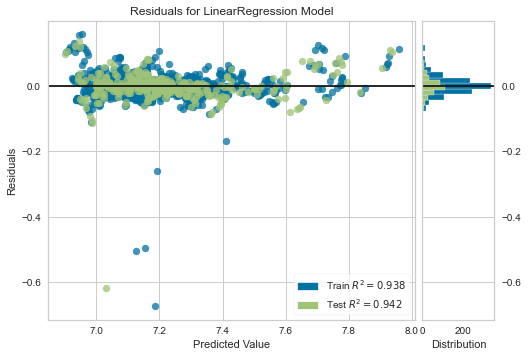

In [659]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(base_ols)
visualizer.fit(XtrainB, ytrainB) 
visualizer.score(XtestB, ytestB)  
visualizer.show() ;

In [660]:
#The final model to get the residuals will be trained in the whole data

Xbase_final = Xbase.fillna(method = 'ffill')

final_base_ols = LinearRegression()
final_base_ols.fit(Xbase_final, y)


LinearRegression()

In [661]:
predictions = final_base_ols.predict(Xbase_final) #gives an array
predictions

array([7.18159268, 7.19253701, 7.14931546, ..., 7.71186428, 7.02553451,
       6.98569969])

In [662]:
residuals = y - predictions
residuals[:5]

0    0.003036
1   -0.011706
2    0.017722
3   -0.008414
4    0.011399
Name: zri_label, dtype: float64

Add residuals to the label and features dataframe

In [663]:
lab_and_features['residuals'] = residuals
lab_and_features.head(3)

,zri_label,RegionName,City,State,Metro,CountyName,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,zip_code,water_land_ratio,residuals
0,7.184629,85032,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,7.113956,2016,1,2016,85032,0.4175,24828.0,35.5,48608.0,16047.0,11318.0,2996.0,37412.0,14726.0,262000.0,2537.0,607.0,301.0,1972.0,63190.0,72477.0,11067.0,19886.0,2715.0,372.0,2093.0,19901.0,44542.0,217.0,217.0,3012.0,2489.0,4611,17718,4970,10113,16540.0,8221.0,2604.0,23830.0,9699.0,1087.0,21735.0,6527.0,201.0,9258.0,2645.0,535.0,36116.0,18559.0,41829.0,9775.0,85032,0.000525,0.003036
1,7.180831,85281,Tempe,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,7.126891,2016,1,2016,85281,0.5071,18006.0,23.8,31921.0,6774.0,15284.0,2637.0,33658.0,4529.0,237600.0,3991.0,2107.0,40.0,4245.0,46804.0,71138.0,4037.0,8262.0,6824.0,1563.0,3464.0,14186.0,33198.0,77.0,77.0,1022.0,1199.0,6797,16134,2717,8010,16426.0,4530.0,1102.0,24532.0,6251.0,943.0,14020.0,11351.0,479.0,9469.0,5709.0,1872.0,28053.0,15451.0,41505.0,3564.0,85281,0.009828,-0.011706
2,7.167038,85225,Chandler,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,7.075809,2016,1,2016,85225,0.4237,25853.0,32.1,56272.0,16524.0,8046.0,2456.0,36144.0,13229.0,251800.0,1801.0,484.0,234.0,952.0,65024.0,65456.0,12222.0,19285.0,3883.0,1258.0,4130.0,24756.0,34048.0,112.0,112.0,3451.0,2385.0,3508,15456,6293,10887,13170.0,8203.0,3197.0,23684.0,8733.0,1745.0,21789.0,3258.0,280.0,8413.0,2070.0,578.0,34704.0,20073.0,41127.0,7588.0,85225,0.000066,0.017722


In [752]:
lab_and_features.to_csv('./data/Phoe_df_predict_2018_w2016.csv')

#### Residuals EDA

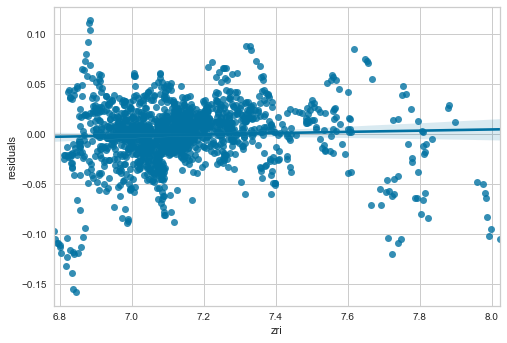

In [664]:
sns.regplot( x= "zri", y = 'residuals', data=lab_and_features);

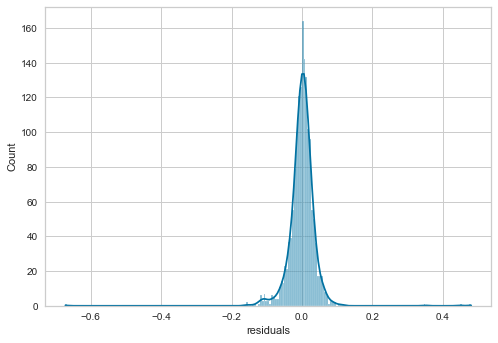

In [665]:
sns.histplot( x= "residuals", data=lab_and_features, kde = True);

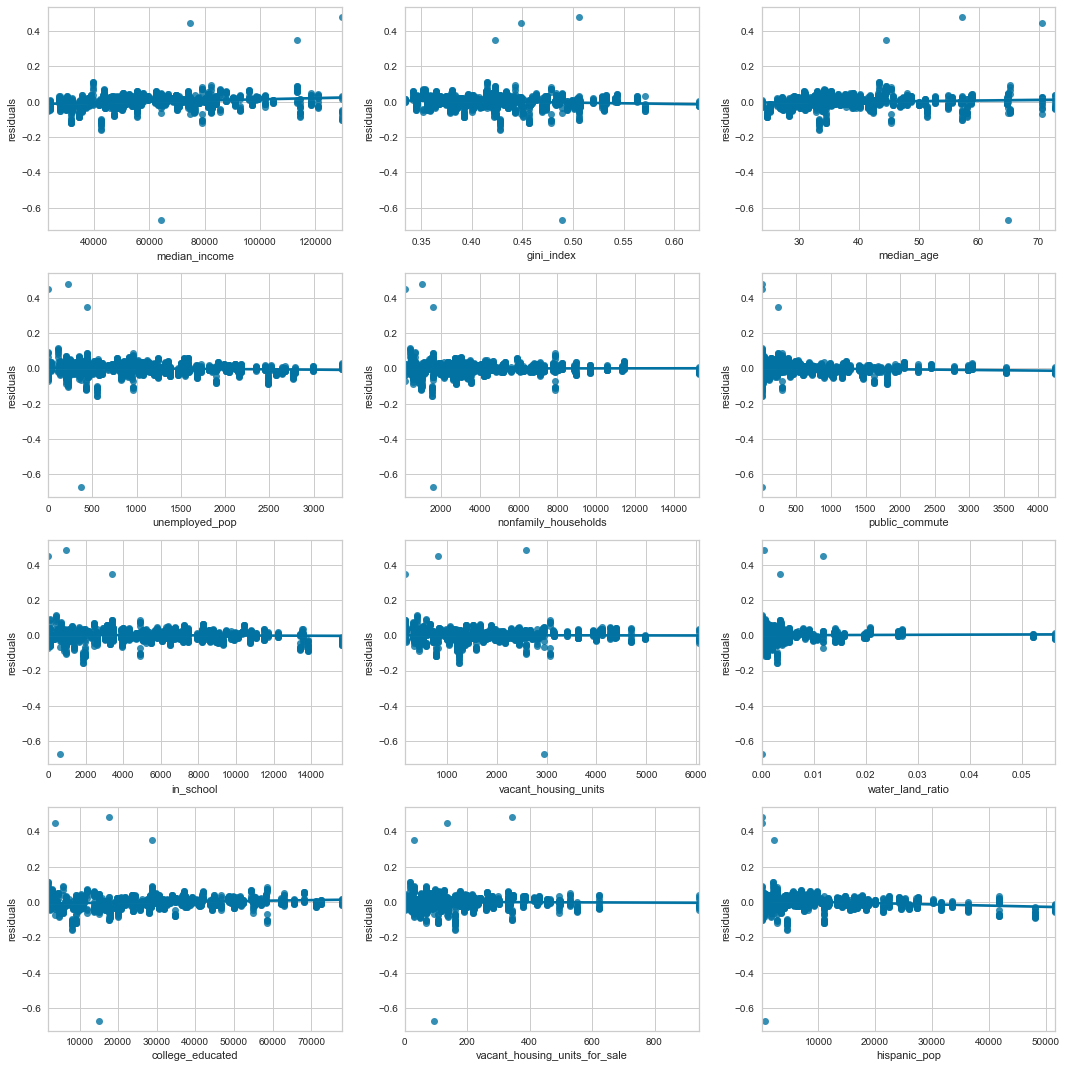

In [666]:
f, axes = plt.subplots(4, 3, figsize=(15,15))

sns.regplot( x= "median_income", y = 'residuals', data=lab_and_features,  ax=axes[0,0])
sns.regplot( x= "gini_index",y = 'residuals', data=lab_and_features,  ax=axes[0,1])
sns.regplot( x= "median_age", y = 'residuals', data=lab_and_features,  ax=axes[0,2])
sns.regplot( x= "unemployed_pop", y = 'residuals', data=lab_and_features,  ax=axes[1,0])
sns.regplot( x= "nonfamily_households", y = 'residuals',data=lab_and_features,  ax=axes[1,1])
sns.regplot( x= "public_commute", y = 'residuals',data=lab_and_features,  ax=axes[1,2])
sns.regplot( x= "in_school", y = 'residuals',data=lab_and_features,  ax=axes[2,0])
sns.regplot( x= "vacant_housing_units", y = 'residuals',data=lab_and_features,  ax=axes[2,1])
sns.regplot( x= "water_land_ratio", y = 'residuals',data=lab_and_features,  ax=axes[2,2])
sns.regplot( x= "college_educated", y = 'residuals',data=lab_and_features,  ax=axes[3,0])
sns.regplot( x= "vacant_housing_units_for_sale", y = 'residuals',data=lab_and_features,  ax=axes[3,1])
sns.regplot( x= "hispanic_pop", y = 'residuals',data=lab_and_features,  ax=axes[3,2])

plt.tight_layout();

The residuals don't have an obvious linear relationship with any of the predictors. So I'll try a tree model

### Modeling the residuals

In [363]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  GridSearchCV, KFold

In [668]:
print_missingness(lab_and_features)

The number of observations is 1554
The number of variables is 61
    
The total number of missing values is 10
The number of rows with missing values is 10
---   ---   ---   ---   ---   ---   ---   ---   ---
zri    10
dtype: int64


In [669]:
lab_and_features.dropna(inplace = True)

In [674]:
Xrfr = lab_and_features.drop(columns = ['residuals','zri',
                                        'zri_label', 'year',
                                        'month', 'geo_id',
                                       'zip_code','Year','RegionName',
                                       'City', 'State','CountyName',
                                       'Metro'])
Yrfr = lab_and_features['residuals'] 
print(Xrfr.shape)
print(len(Yrfr))

(1544, 48)
1544


In [771]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xrfr,Yrfr)

In [772]:
Xtrain.sample(5)

,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,water_land_ratio
570,0.4358,21662.0,51.1,37271.0,7874.0,5181.0,1135.0,10077.0,9406.0,134300.0,4379.0,195.0,454.0,24.0,17442.0,21871.0,3455.0,14382.0,152.0,541.0,316.0,4343.0,23739.0,67.0,67.0,1147.0,652.0,891,4356,1779,3051,9985.0,2582.0,488.0,5242.0,3391.0,733.0,7180.0,510.0,78.0,2085.0,994.0,492.0,15382.0,5986.0,12549.0,10373.0,0.001194
1210,0.4411,25116.0,31.1,44702.0,8483.0,7265.0,1856.0,20672.0,6758.0,242200.0,1761.0,788.0,205.0,1731.0,36344.0,38734.0,5783.0,10119.0,1457.0,2053.0,1639.0,11202.0,21733.0,15.0,15.0,1747.0,1521.0,2523,9560,2966,5623,10068.0,4233.0,1447.0,14102.0,4879.0,836.0,11615.0,5510.0,279.0,6301.0,1913.0,497.0,19595.0,10171.0,23138.0,4866.0,0.019760
868,0.3785,32001.0,42.3,76015.0,6261.0,2637.0,824.0,12567.0,5882.0,295600.0,1217.0,452.0,219.0,106.0,22734.0,27861.0,3908.0,9765.0,1277.0,201.0,916.0,3448.0,18967.0,23.0,23.0,745.0,350.0,1228,5448,1579,4312,3603.0,3548.0,1747.0,6604.0,4317.0,785.0,7820.0,2250.0,198.0,1989.0,702.0,127.0,13644.0,5920.0,13466.0,5527.0,0.000933
941,0.4243,41257.0,39.0,70860.0,10155.0,6768.0,1107.0,22498.0,9499.0,335000.0,1883.0,528.0,102.0,862.0,38700.0,55373.0,5686.0,9058.0,1827.0,933.0,2223.0,7267.0,25650.0,28.0,28.0,1638.0,646.0,1874,11353,3192,6079,7024.0,6103.0,3796.0,14130.0,5718.0,638.0,14752.0,4011.0,321.0,5928.0,941.0,234.0,20231.0,8709.0,23436.0,6308.0,0.003044
167,0.3623,33469.0,31.7,90773.0,10059.0,3088.0,1026.0,21293.0,8468.0,357400.0,1301.0,596.0,133.0,230.0,38162.0,50300.0,9115.0,8059.0,2454.0,444.0,1495.0,7055.0,29171.0,51.0,51.0,3979.0,498.0,1771,10510,3268,5744,3664.0,5733.0,3750.0,11423.0,6700.0,1589.0,12311.0,2067.0,193.0,3514.0,821.0,151.0,21341.0,14867.0,23428.0,3236.0,0.000780


In [773]:
rfr = RandomForestRegressor()
rfr.fit(Xtrain, ytrain)
print(f'RF regression training score: {rfr.score(Xtrain, ytrain)}')
print(f'RF regression testing score: {rfr.score(Xtest, ytest)}')

RF regression training score: 0.6401033700299518
RF regression testing score: 0.5642877722325499


In [774]:
#parameters grid
params = {'n_estimators': [250,300,400],
         'min_samples_leaf':[3,4,5],
         'max_features':[0.2,0.3, 0.4]}
cv = KFold(n_splits = 5, shuffle= True)

grid = GridSearchCV(estimator = rfr,
                   param_grid = params,
                   cv = cv,
                   return_train_score = True)

grid.fit(Xtrain, np.ravel(ytrain))

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_features': [0.2, 0.3, 0.4],
                         'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [250, 300, 400]},
             return_train_score=True)

In [775]:
grid.best_params_

{'max_features': 0.4, 'min_samples_leaf': 5, 'n_estimators': 250}

In [776]:
best_rf = grid.best_estimator_
print(f'RF best regression training score: {best_rf.score(Xtrain, ytrain)}')
print(f'RF best regression testing score: {best_rf.score(Xtest, ytest)}')

RF best regression training score: 0.637685900439177
RF best regression testing score: 0.5710287009276849


In [777]:
feat_imp = pd.Series(rfr.feature_importances_, index = Xtrain.columns)
feat_imp.sort_values(ascending = False).head(15)

income_per_capita                                    0.112146
white_pop                                            0.088286
income_over_125000                                   0.067702
owner_occupied_housing_units_upper_value_quartile    0.062897
vacant_housing_units_for_sale                        0.057903
median_income                                        0.045958
vacant_housing_units_for_rent                        0.042157
asian_pop                                            0.034689
large_dwellings                                      0.029333
vacant_housing_units                                 0.028077
income_less_than_125000                              0.021818
rent_over50                                          0.021503
water_land_ratio                                     0.019290
nonfamily_households                                 0.018593
rent_under10                                         0.018195
dtype: float64

In [778]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(Xtrain, np.ravel(ytrain))

GradientBoostingRegressor()

In [779]:
print(gbr.score(Xtrain,ytrain))
print(gbr.score(Xtest,ytest))

y_pred = gbr.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred,squared = False)
print(f'Gradient Boosting RMSE: {RMSE}')

0.6337620028537327
0.5673349107178818
Gradient Boosting RMSE: 0.020727315581380884


In [780]:
paramsGB = {'learning_rate':[1,1.5], #lets decrease the size of each tree
            'n_estimators': [60,80,100],
            'max_depth':[2,3,4],
            'subsample':[ 0.8, 0.9]}

gridGB = GridSearchCV(estimator = gbr,
                       param_grid = paramsGB,
                       cv = cv,
                       return_train_score = True)

gridGB.fit(Xtrain, np.ravel(ytrain))

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [1, 1.5], 'max_depth': [2, 3, 4],
                         'n_estimators': [60, 80, 100],
                         'subsample': [0.8, 0.9]},
             return_train_score=True)

In [781]:
gridGB.best_params_

{'learning_rate': 1, 'max_depth': 2, 'n_estimators': 60, 'subsample': 0.9}

In [782]:
best_gb = gridGB.best_estimator_
print(f'GB best regression training score: {best_gb.score(Xtrain, ytrain)}')
print(f'GB best regression testing score: {best_gb.score(Xtest, ytest)}')

GB best regression training score: 0.6334161287750909
GB best regression testing score: 0.5701885221163628


The best gradient boosting model from the grid search is worse than the default one. It is definetly overfit. Keep the params

In [783]:
feat_impGB = pd.Series(gbr.feature_importances_, index = Xtrain.columns)
feat_impGB.sort_values(ascending = False).head(15)

income_per_capita                                    0.124203
white_pop                                            0.089961
vacant_housing_units_for_sale                        0.074938
median_income                                        0.062383
income_over_125000                                   0.057542
owner_occupied_housing_units_upper_value_quartile    0.056174
large_dwellings                                      0.046297
public_commute                                       0.040586
rent_under10                                         0.035984
asian_pop                                            0.033895
vacant_housing_units_for_rent                        0.033646
income_less_than_125000                              0.024733
vacant_housing_units                                 0.023911
other_race_pop                                       0.021087
small_dwellings                                      0.020519
dtype: float64